### Understanding Convolutional Neural Networks (CNNs)
In this notebook we will work with the convolution technique applied to 2D images.
Let us start by importing the required modules

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

CNNs are a class of neural networks used for tasks involving images, such as classification, detection, and segmentation.
They work by detecting patterns in images using filters (kernels) in a process called convolution.
Convolution is an operation that slides a small matrix (called a kernel or filter) over an image and computes element-wise multiplications.
This allows CNNs to detect edges, textures, and patterns.
A 2D image is given by a 2D array, each element representing the intensity of the pixel.

In [2]:
# Visualize a simple convolution operation
image = np.array([[2, 2, 2, 2, 2],
                  [2, 4, 4, 4, 2],
                  [2, 4, 8, 4, 2],
                  [2, 4, 4, 4, 2],
                  [2, 2, 2, 2, 2]])

Let us now visualize the image represented by this array

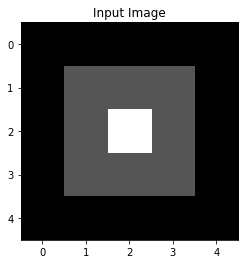

In [4]:
def visualize_image(image):
    """
    Visualizes an image.
    """
    plt.imshow(image, cmap='gray')
    plt.title("Input Image")
    plt.show()

visualize_image(image)

We can now define an array that will represent a filter or a kernel that acts on the image. Let us assume that the filter has 3x3 size (it can be smaller or bigger).

In [5]:
kernel = np.array([[1, 0, -1],
                   [1, 0, -1],
                   [1, 0, -1]])

And we can visualize the kernel as well

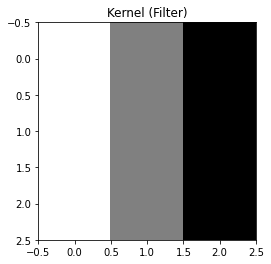

In [6]:
def visualize_kernel(kernel):
    """
    Visualizes a kernel.
    """
    plt.imshow(kernel, cmap='gray')
    plt.title("Kernel (Filter)")
    plt.show()

visualize_kernel(kernel)

A convolution is the element-wise multiplication of the kernel and subarrays of the image and the result is an array with the same shape as the filter. Afterwards, the elements of this result are summed to produce a scalar.
When performing a convolution, two important parameters are the padding and the stride.
Padding refers to the practice of adding extra rows and columns around an image to control how the convolutional filter interacts with its edges. In our case, we will use the function np.pad to apply padding to the image:
image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
pad_width=padding indicates the number of pixels to add around the edges of the image. For example:
- padding=1: Adds 1 row/column on all sides.
- padding=2: Adds 2 rows/columns on all sides.
Adding padding ensures preservation of spatial dimensions. Indeed, by padding the image, the output size can remain the same as the input size. It also ensures full coverage of edge pixels, since padding allows the kernel to process the edges of the image effectively.
Stride refers to the step size or the number of pixels the convolutional filter (kernel) moves during each step as it slides across the image. It controls how much the filter shifts when it is applied to the input image. Stride=1 ensures maximum overlap between neighbouring regions, but increases the size of the output, whereas Stride>1 reduces the overlap while decreasing the size of the output.

In [7]:
# Implementing Convolution Manually

def convolution2d(image, kernel, stride=1, padding=0):
    """
    Perform 2D convolution between an image and a kernel.
    """
    # Apply padding
    image_padded = np.pad(image, pad_width=padding, mode='constant', constant_values=0)
    
    # Compute the output dimensions
    kernel_height, kernel_width = kernel.shape
    output_height = ((image_padded.shape[0] - kernel_height) // stride) + 1
    output_width = ((image_padded.shape[1] - kernel_width) // stride) + 1
    
    # Initialize the output feature map
    output = np.zeros((output_height, output_width))
    
    # Perform convolution
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image_padded[i*stride:i*stride+kernel_height, j*stride:j*stride+kernel_width]
            output[i, j] = np.sum(region * kernel)
    
    return output

Now we can apply convolution of the example image

In [8]:
# Apply convolution on the example image
output_feature_map = convolution2d(image, kernel)

Output after convolution:
 [[ -8.   0.   8.]
 [-10.   0.  10.]
 [ -8.   0.   8.]]


And visualize the result

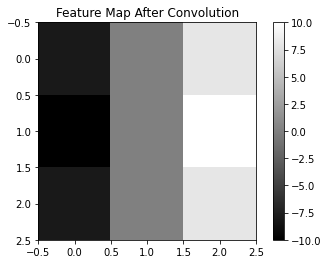

In [9]:
plt.imshow(output_feature_map, cmap='gray')
plt.title("Feature Map After Convolution")
plt.colorbar()
plt.show()

A commonly used technique in CNN is MaxPooling. It is a downsampling operation that reduces the spatial dimensions (height and width) of feature maps while retaining the most important information. The key idea is to condense information by selecting the maximum value from a small region (usually a square) of the feature map. Here, again, the two important parameters are the size of the region where the maximum will be computed and the stride.

In [10]:
def max_pooling(image, size=2, stride=2):
    """
    Perform max pooling on an image with a given pool size and stride.
    """
    output_height = (image.shape[0] - size) // stride + 1
    output_width = (image.shape[1] - size) // stride + 1
    pooled = np.zeros((output_height, output_width))
    
    for i in range(0, output_height):
        for j in range(0, output_width):
            region = image[i*stride:i*stride+size, j*stride:j*stride+size]
            pooled[i, j] = np.max(region)
    
    return pooled

Now we can apply MaxPooling to the feature map.

In [12]:
pooled_feature_map = max_pooling(output_feature_map)

Output after Max Pooling:
 [[0.]]


And plot the result, which in this case is trivial.

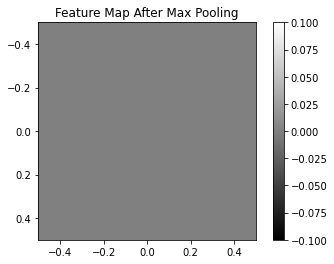

In [13]:
plt.imshow(pooled_feature_map, cmap='gray')
plt.title("Feature Map After Max Pooling")
plt.colorbar()
plt.show()

After doing all the previous steps, we have all the elements to perform a CNN pipeline, by combining convolution and MaxPooling. We will also add an intermediate step consisting of a ReLU activation function. The basic pipeline includes: Convolution -> Activation (ReLU, using np.maximum) -> MaxPooling.

In [15]:
# Step 1: Convolution
feature_map = convolution2d(image, kernel)

# Step 2: Activation Function (ReLU)
feature_map_relu = np.maximum(feature_map, 0)

# Step 3: Max Pooling
pooled_output = max_pooling(feature_map_relu)

And we can visualize all the steps of the pipeline

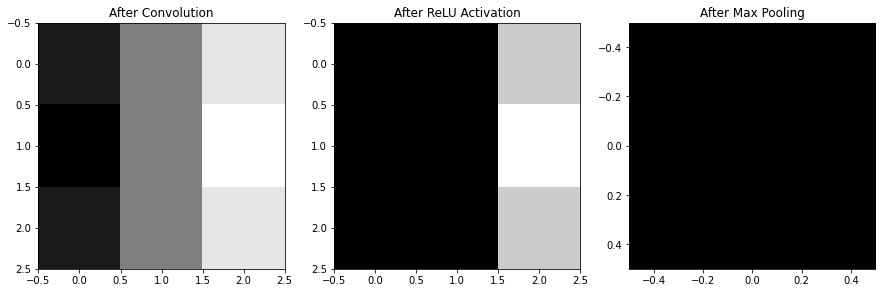

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(feature_map, cmap='gray')
ax[0].set_title("After Convolution")

ax[1].imshow(feature_map_relu, cmap='gray')
ax[1].set_title("After ReLU Activation")

ax[2].imshow(pooled_output, cmap='gray')
ax[2].set_title("After Max Pooling")
plt.show()

Apply the pipeline to a bigger synthetic image.

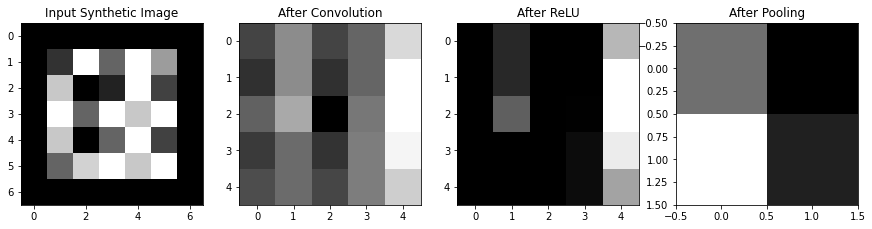

In [32]:
# Create a simple synthetic image
synthetic_image = np.array([[0, 0, 0, 0, 0, 0, 0],
                            [0, 50, 255, 100, 255, 156, 0],
                            [0, 200, 0, 34, 255, 65, 0],
                            [0, 255, 100, 255, 200, 255, 0],
                            [0, 200, 0, 100, 255, 65, 0],
                            [0, 100, 210, 255, 200, 255, 0],
                            [0, 0, 0, 0, 0, 0, 0]])/255

# Kernel for edge detection
edge_kernel = np.array([[1, 0, -1],
                        [1, 0, -1],
                        [1, 0, -1]])

# Apply convolution
synthetic_feature_map = convolution2d(synthetic_image, edge_kernel)
synthetic_feature_map_relu = np.maximum(synthetic_feature_map, 0)
synthetic_pooled_output = max_pooling(np.maximum(synthetic_feature_map_relu, 0))

# Visualize Results
fig, ax = plt.subplots(1, 4, figsize=(15, 5))
ax[0].imshow(synthetic_image, cmap='gray')
ax[0].set_title("Input Synthetic Image")

ax[1].imshow(synthetic_feature_map, cmap='gray')
ax[1].set_title("After Convolution")

ax[2].imshow(synthetic_feature_map_relu, cmap='gray')
ax[2].set_title("After ReLU")

ax[3].imshow(synthetic_pooled_output, cmap='gray')
ax[3].set_title("After Pooling")
plt.show()

We will now apply the pipeline to a realistic image. For this, first load the image.

In [25]:
def load_image(image_path, size=(128, 128)):
    """
    Load an image, resize it, and convert to grayscale.
    """
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    image = image.resize(size)
    image_np = np.array(image)
    return image_np

And visualize it

In [26]:
def show_image(image, title="Image"):
    """
    Display a grayscale image.
    """
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

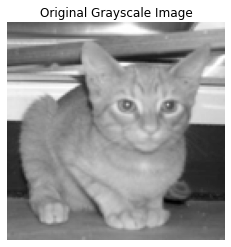

In [27]:
image_path = "cat.4150.jpg"
image = load_image(image_path)
show_image(image, title="Original Grayscale Image")

We will use three different kernels to study their impact on the image

In [28]:
# Example kernels (filters)
kernel_1 = np.array([[1, 0, -1],
                    [1, 0, -1],
                    [1, 0, -1]])

kernel_2 = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])

kernel_3 = np.array([[1, 1, 1],
                    [1, 1, 1],
                    [1, 1, 1]]) / 9.0

Apply each of these kernels to the image and see what they do on it.

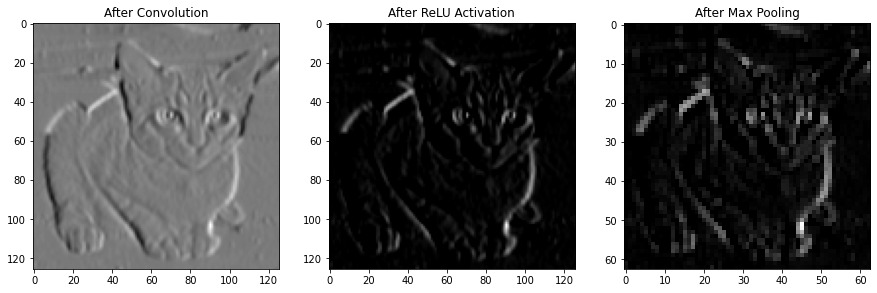

In [30]:
# Step 1: Convolution with kernel
feature_map_1 = convolution2d(image, kernel_1)

# Step 2: Apply ReLU activation
relu_feature_map_1 = np.maximum(feature_map_1, 0)

# Step 3: Max Pooling
pooled_relu_feature_map_1 = max_pooling(relu_feature_map_1)

# Visualize the CNN-like behavior
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
ax[0].imshow(feature_map_1, cmap='gray')
ax[0].set_title("After Convolution")

ax[1].imshow(relu_feature_map_1, cmap='gray')
ax[1].set_title("After ReLU Activation")

ax[2].imshow(pooled_relu_feature_map_1, cmap='gray')
ax[2].set_title("After Max Pooling")
plt.show()
